### ABC, a leading market research agency in Delhi, conducted a primary household survey in the Delhi region for an FI client planning to launch its financial products.The objective of the survey was to study the socio-economic status of the people living in the Delhi Development Authority flats


####  A total 29,834 respondents were interviewed. ABC wants to determine the factors that influence the monthly income of the respondents, so that it will help its client to streamline its marketing strategy.

#### The features are
##### 1)age
##### 2)job_type
##### 3)education
##### 4)education level
##### 5)Job
##### 6)marital status
##### 7)Religion
##### 8)gender
##### 9)hoyrs per week
##### 10)Income
##### here income be the target variable

In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the dataframe
df=pd.read_csv("survey_ncr.csv")
data=df

In [3]:
df.head(10)
#df.tail()

,age,job_type,education,education_num,job,marital_status,religion,gender,hours_per_week,income
0,47,Private,10th,6,Executive,Unmarried,ST,Female,45,less than 30 k INR
1,40,Private,10th,6,Mechanic,Unmarried,ST,Male,40,less than 30 k INR
2,30,Private,10th,6,Other-service,Unmarried,ST,Male,40,less than 30 k INR
3,27,Private,10th,6,Taxi-driver,Unmarried,ST,Male,75,less than 30 k INR
4,38,Private,10th,6,Driver,Unmarried,Christians,Female,40,less than 30 k INR
5,54,Private,10th,6,Other-service,Unmarried,Muslim,Female,10,less than 30 k INR
6,61,Private,10th,6,Other-service,Unmarried,Muslim,Female,24,less than 30 k INR
7,29,Private,10th,6,Driver,Unmarried,Muslim,Female,25,less than 30 k INR
8,51,Private,10th,6,Mechanic,Unmarried,Muslim,Female,35,less than 30 k INR
9,45,Private,10th,6,Other-service,Unmarried,Muslim,Female,38,less than 30 k INR


In [4]:
#shape of the dataframe
df.shape

(29834, 10)

In [5]:
#datatypes of dataframe
df.dtypes

age                int64
job_type          object
education         object
education_num      int64
job               object
marital_status    object
religion          object
gender            object
hours_per_week     int64
income            object
dtype: object

In [6]:
#checking for missing values
df.isnull().sum() #intresting, no null values.

age               0
job_type          0
education         0
education_num     0
job               0
marital_status    0
religion          0
gender            0
hours_per_week    0
income            0
dtype: int64

In [7]:
#column name
df.columns

Index(['age', 'job_type', 'education', 'education_num', 'job',
       'marital_status', 'religion', 'gender', 'hours_per_week', 'income'],
      dtype='object')

In [8]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,age,education_num,hours_per_week
count,29834.000000,29834.000000,29834.000000
mean,38.673594,10.159415,41.157203
std,13.011830,2.535954,11.809319
min,18.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,47.000000,13.000000,45.000000
90%,57.000000,13.000000,55.000000
95%,62.000000,14.000000,60.000000
99%,72.000000,16.000000,80.000000


In [9]:
#since most of the features are in the object data type,i can map the individual unique values to int values.


#### Mapping

In [10]:
df.job_type.unique()

array(['Private', 'Government'], dtype=object)

In [11]:
df['job_type'] = df['job_type'].map({'Private': 1, 'Government': 0})

In [12]:
df.education.unique()

array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
       'diploma', 'Bachelors', 'Doctorate', 'High School Pass', 'Masters',
       'illiterate', 'Prof-school', 'College'], dtype=object)

In [13]:
df['education'] = df['education'].map({'10th': 1, '11th': 2 ,'12th':3, '1st-4th':5,'5th-6th':6,'7th-8th':7,'9th':8,
                                      'diploma':9,'Bachelors':10,'Doctorate':11,'High School Pass':12,'Masters':13,'illiterate':14,
                                      'Prof-school':15,'College':16})

In [14]:
#df.head()
df.education_num.unique()

array([ 6,  7,  8,  2,  3,  4,  5, 12, 11, 13, 16,  9, 14,  1, 15, 10],
      dtype=int64)

In [15]:
df.job.unique()

array(['Executive', 'Mechanic', 'Other-service', 'Taxi-driver', 'Driver',
       'Police', 'Domestic Servants', 'Sales', 'Farmer', 'Teacher',
       'Fireman', 'Call Center', 'Manager', 'Army'], dtype=object)

In [16]:
df['job'] = df['job'].map({'Executive': 1, 'Mechanic': 2 ,'Other-service':3, 'Taxi-driver':5,'Driver':6,'Police':7,'Domestic Servants':8,
                                      'Sales':9,'Farmer':10,'Teacher':11,'Fireman':12,'Call Center':13,'Manager':14,
                                      'Army':15})

In [17]:
df.marital_status.unique()

array(['Unmarried', 'Married'], dtype=object)

In [18]:
df['marital_status'] = df['marital_status'].map({'Unmarried': 1, 'Married': 0})

In [19]:
df.religion.unique()

array(['ST', 'Christians', 'Muslim', 'Hindu', 'Other'], dtype=object)

In [20]:
df['religion'] = df['religion'].map({'ST': 1, 'Christians': 2 ,'Muslim':3, 'Hindu':5,'Other':6})

In [21]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [22]:
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})

In [23]:
df.income.unique()

array(['less than 30 k INR', 'more than 30 k INR'], dtype=object)

In [24]:
df['income'] = df['income'].map({'less than 30 k INR': 1, 'more than 30 k INR': 0})

In [25]:
#df.head()
df.tail(10)

,age,job_type,education,education_num,job,marital_status,religion,gender,hours_per_week,income
29824,65,1,16,10,1,1,5,1,45,1
29825,45,1,16,10,3,1,5,1,45,1
29826,54,1,16,10,2,1,5,1,50,1
29827,62,1,16,10,10,1,5,1,50,1
29828,66,1,16,10,9,1,5,1,50,0
29829,45,1,16,10,1,1,5,1,55,1
29830,37,1,16,10,2,1,5,0,40,1
29831,74,1,16,10,1,1,5,0,40,1
29832,50,0,16,10,11,1,5,0,40,1
29833,48,1,16,10,9,1,5,0,50,0


## EDA 

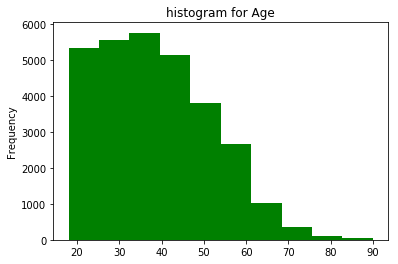

In [26]:
#histogram for age
df.age.plot(kind='hist', title='histogram for Age', color='green')  # highly right skewed

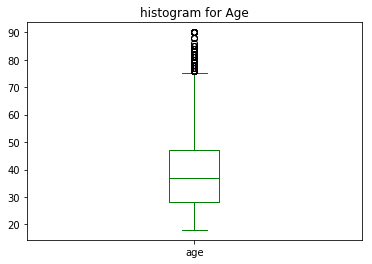

In [27]:
df.age.plot(kind='box', title='histogram for Age', color='green')

In [28]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
df.describe(percentiles=[.25,.5,.75,.90,.95,.99]).transpose()

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
age,29834.0,38.673594,13.011830,18.0,28.0,37.0,47.0,57.0,62.0,72.0,90.0
job_type,29834.0,0.856808,0.350275,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
education,29834.0,11.249883,3.987865,1.0,10.0,12.0,13.0,16.0,16.0,16.0,16.0
education_num,29834.0,10.159415,2.535954,1.0,9.0,10.0,13.0,13.0,14.0,16.0,16.0
job,29834.0,6.181705,3.779930,1.0,2.0,7.0,9.0,11.0,12.0,13.0,15.0
marital_status,29834.0,0.535161,0.498771,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
religion,29834.0,4.692666,0.841931,1.0,5.0,5.0,5.0,5.0,5.0,5.0,6.0
gender,29834.0,0.322853,0.467575,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
hours_per_week,29834.0,41.157203,11.809319,1.0,40.0,40.0,45.0,55.0,60.0,80.0,99.0
income,29834.0,0.748341,0.433974,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


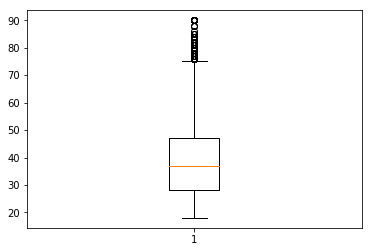

In [29]:
##out lier treatment for age
plt.boxplot(df.age)
Q1 = df.age.quantile(0.25)
Q3 = df.age.quantile(0.75)
IQR = Q3 - Q1
df1 = df[(df.age >= Q1 - 1.5*IQR) & (df.age <= Q3 + 1.5*IQR)]

In [30]:
df.age.describe()

count    29834.000000
mean        38.673594
std         13.011830
min         18.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

In [31]:
df.dtypes

age               int64
job_type          int64
education         int64
education_num     int64
job               int64
marital_status    int64
religion          int64
gender            int64
hours_per_week    int64
income            int64
dtype: object

In [32]:
data['job'].value_counts()

11    4028
2     4016
1     3991
7     3698
9     3498
3     3083
6     1964
5     1569
8     1311
10     980
13     911
12     641
14     135
15       9
Name: job, dtype: int64

In [33]:
#how job effects income
pd.crosstab(df.income,df.job)

job,1,2,3,5,6,7,8,9,10,11,12,13,14,15
income,,,,,,,,,,,,,,
0,1937,908,132,319,245,498,83,970,115,1811,210,278,1,1
1,2054,3108,2951,1250,1719,3200,1228,2528,865,2217,431,633,134,8


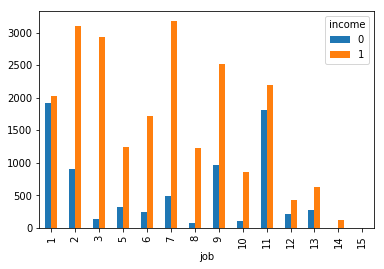

In [34]:
#bar plot
pd.crosstab(df1.job, df1.income).plot(kind='bar')

In [35]:
#how education effects income
pd.crosstab(df.income,df.education)

education,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16
income,,,,,,,,,,,,,,,
0,59,59,373,6,12,35,25,256,2126,280,1617,918,0,406,1336
1,655,835,1279,145,275,519,407,752,2918,95,8216,709,45,136,5340


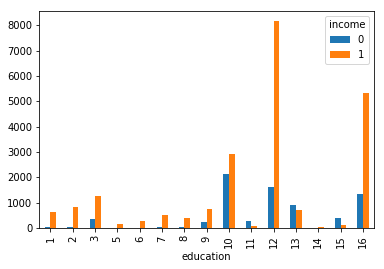

In [36]:
#bar
pd.crosstab(df1.education, df1.income).plot(kind='bar')

In [37]:
#how job_type effects income
pd.crosstab(df.job_type, df.income)

income,0,1
job_type,,
0,1318,2954
1,6190,19372


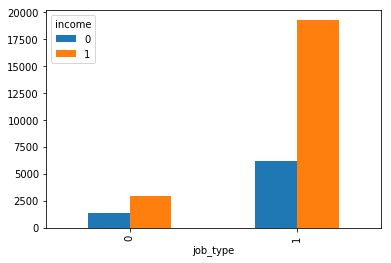

In [38]:
#bar
pd.crosstab(df1.job_type, df1.income).plot(kind='bar')

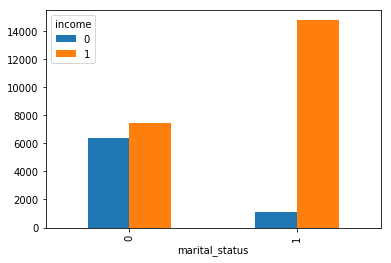

In [39]:
#cross tab for marital status and income
#how income effects with marital status
pd.crosstab(df1.marital_status, df1.income).plot(kind='bar')

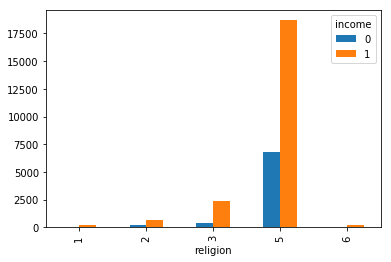

In [40]:
#how religion effects income
pd.crosstab(df1.religion, df1.income).plot(kind='bar')

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


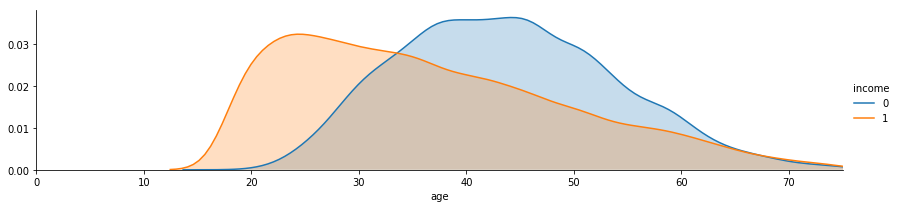

In [41]:
#facet graphs
#facet graphs
facet = sns.FacetGrid(df1, hue="income",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, df1['age'].max()))
facet.add_legend();

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


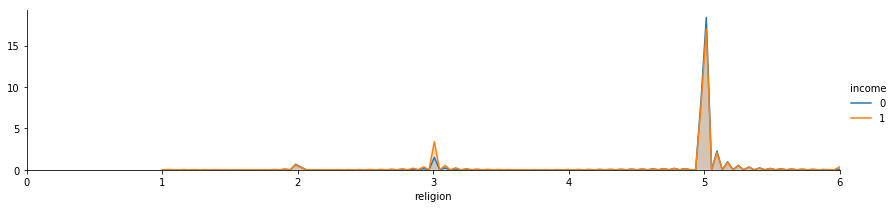

In [42]:
facet = sns.FacetGrid(df1, hue="income",aspect=4)
facet.map(sns.kdeplot,'religion',shade= True)
facet.set(xlim=(0, df1['religion'].max()))
facet.add_legend();

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


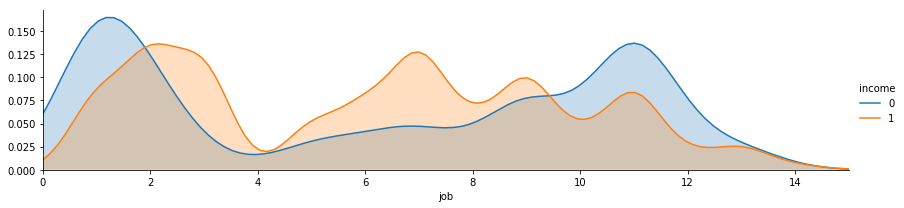

In [43]:
facet = sns.FacetGrid(df1, hue="income",aspect=4)
facet.map(sns.kdeplot,'job',shade= True)
facet.set(xlim=(0, df1['job'].max()))
facet.add_legend();

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


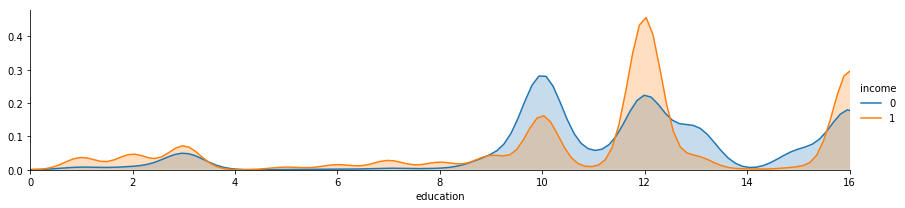

In [44]:
facet = sns.FacetGrid(df1, hue="income",aspect=4)
facet.map(sns.kdeplot,'education',shade= True)
facet.set(xlim=(0, df1['education'].max()))
facet.add_legend();

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


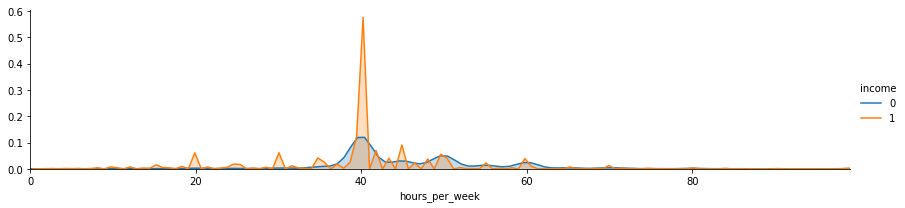

In [45]:
facet = sns.FacetGrid(df1, hue="income",aspect=4)
facet.map(sns.kdeplot,'hours_per_week',shade= True)
facet.set(xlim=(0, df1['hours_per_week'].max()))
facet.add_legend();

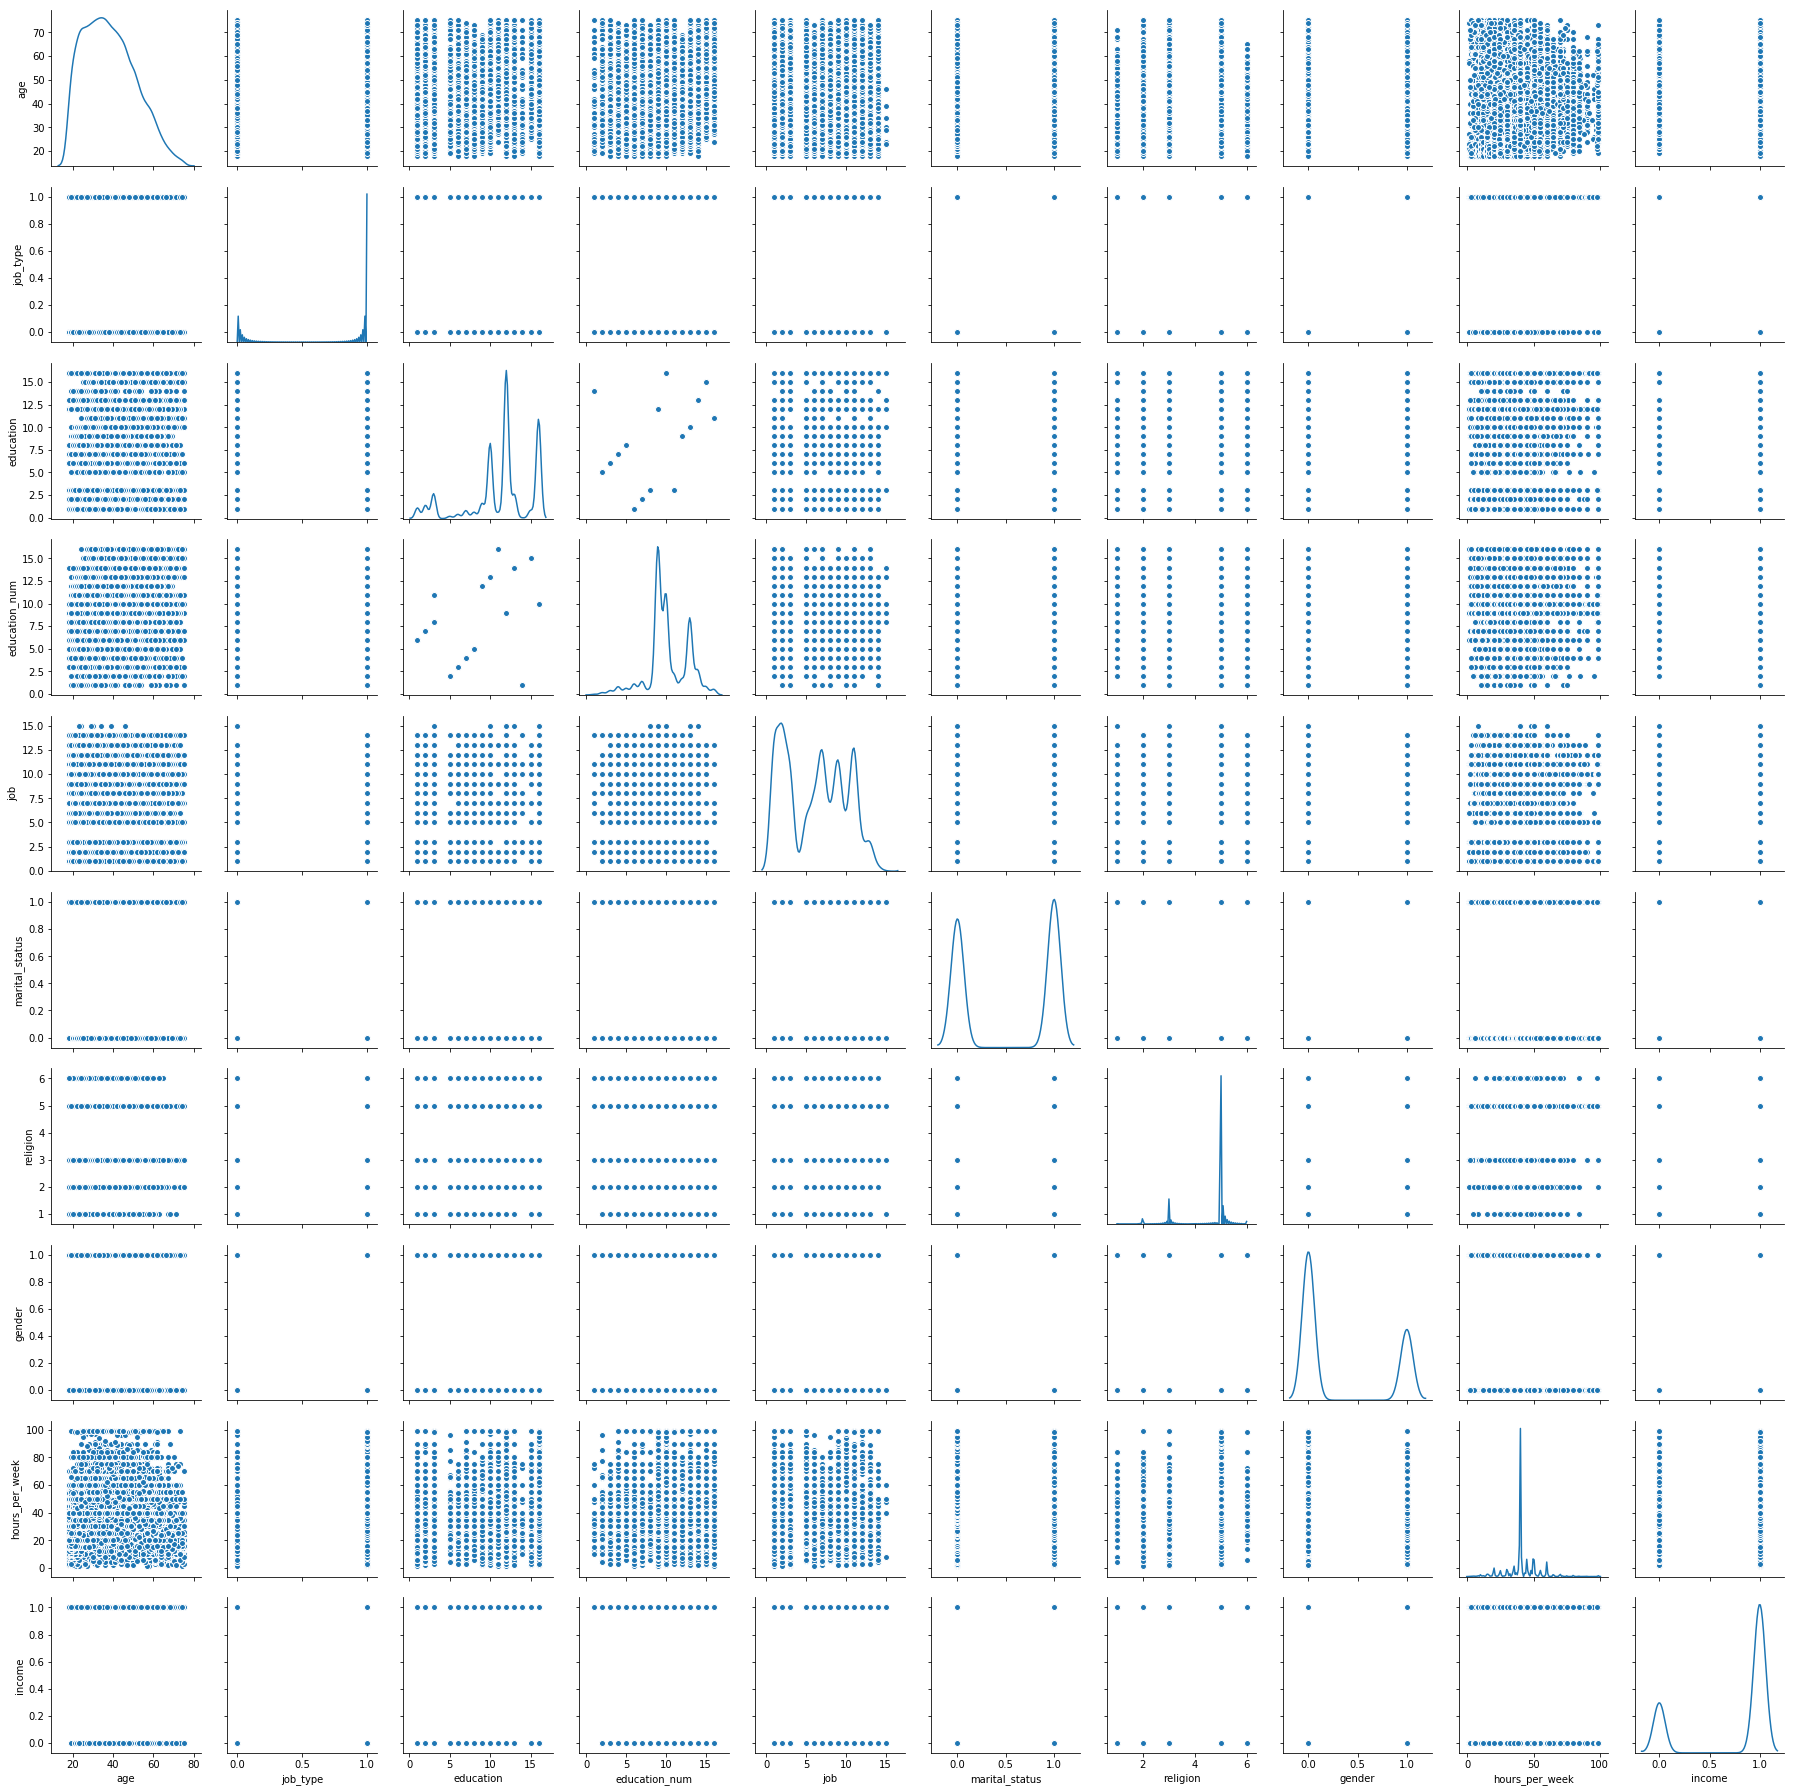

In [45]:
# Pairplot using sns
import seaborn as sns
sns.pairplot(df1 , diag_kind = 'kde')

In [46]:
raw=df1
label=df1['income']

In [47]:
df2 = df1.drop(labels = "income", axis = 1)
df2.head()

,age,job_type,education,education_num,job,marital_status,religion,gender,hours_per_week
0,47,1,1,6,1,1,1,1,45
1,40,1,1,6,2,1,1,0,40
2,30,1,1,6,3,1,1,0,40
3,27,1,1,6,5,1,1,0,75
4,38,1,1,6,6,1,2,1,40


### Scalling

In [48]:
from scipy.stats import zscore
z_data= df2.apply(zscore)
z_data.head()

,age,job_type,education,education_num,job,marital_status,religion,gender,hours_per_week
0,0.678342,0.409043,-2.570846,-1.64709,-1.371094,0.931831,-4.382969,1.448060,0.321168
1,0.124288,0.409043,-2.570846,-1.64709,-1.106421,0.931831,-4.382969,-0.690579,-0.104469
2,-0.667219,0.409043,-2.570846,-1.64709,-0.841749,0.931831,-4.382969,-0.690579,-0.104469
3,-0.904671,0.409043,-2.570846,-1.64709,-0.312405,0.931831,-4.382969,-0.690579,2.874992
4,-0.034014,0.409043,-2.570846,-1.64709,-0.047733,0.931831,-3.195868,1.448060,-0.104469


In [49]:
#appending the target label to z_data
z_data["income"]=label

In [50]:
z_data.head()

,age,job_type,education,education_num,job,marital_status,religion,gender,hours_per_week,income
0,0.678342,0.409043,-2.570846,-1.64709,-1.371094,0.931831,-4.382969,1.448060,0.321168,1
1,0.124288,0.409043,-2.570846,-1.64709,-1.106421,0.931831,-4.382969,-0.690579,-0.104469,1
2,-0.667219,0.409043,-2.570846,-1.64709,-0.841749,0.931831,-4.382969,-0.690579,-0.104469,1
3,-0.904671,0.409043,-2.570846,-1.64709,-0.312405,0.931831,-4.382969,-0.690579,2.874992,1
4,-0.034014,0.409043,-2.570846,-1.64709,-0.047733,0.931831,-3.195868,1.448060,-0.104469,1


## spliting train test

In [51]:
#importing packages
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [52]:
features = z_data.iloc[:,0:9]


label1 = z_data.iloc[:,9]

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label1, test_size=0.2, random_state=0)

In [54]:
X_train.shape ,X_test.shape, y_train.shape, y_test.shape

((23732, 9), (5933, 9), (23732,), (5933,))

### Implementing Models 
#### Decision Tree Classifier


In [55]:
#lets use decision tree without upsampling
DTClassifier= DecisionTreeClassifier (max_depth=9, min_samples_split =3,criterion='gini',min_samples_leaf=9)
DTClassifier.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=9, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [56]:
predicted_labels = DTClassifier.predict(X_test)
predicted_labels

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [57]:
#confusion matrix and accuracy
model_score = DTClassifier.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,predicted_labels)) #not bad

0.8289229732007416
[[ 769  691]
 [ 324 4149]]


##  Using SMOTE to upsample lower class

In [58]:
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())


print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))



print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

Before UpSampling, counts of label '1': 17713
Before UpSampling, counts of label '0': 6019 

After UpSampling, counts of label '1': 17713
After UpSampling, counts of label '0': 17713 

After UpSampling, the shape of train_X: (35426, 9)
After UpSampling, the shape of train_y: (35426,) 



In [59]:
X_train_res.shape ,X_train.shape

((35426, 9), (23732, 9))

In [60]:
# dt on upsampled data
#lets use decision tree
DTClassifier1= DecisionTreeClassifier (max_depth=15,criterion='gini',min_samples_leaf=9)
DTClassifier1.fit(X_train_res,y_train_res)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=9, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [61]:
predicted_labels1 = DTClassifier1.predict(X_test)

In [62]:
#confusion matrix and accuracy
model_score1 = DTClassifier1.score(X_test, y_test)
print(model_score1)
print(metrics.confusion_matrix(y_test,predicted_labels1))

0.7874599696612169
[[1120  340]
 [ 921 3552]]


## Random Forest Classifier

In [63]:
#importing packages
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn import model_selection
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn import metrics


## after upsampling

In [64]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 650, random_state=1)
rfcl = rfcl.fit(X_train_res, y_train_res)



In [65]:
predicted_labels2 = rfcl.predict(X_test)
metrics.accuracy_score(predicted_labels2,y_test)

0.7995954828922973

In [66]:
print(metrics.confusion_matrix(y_test,predicted_labels2))

[[ 941  519]
 [ 670 3803]]


## before upsampling

In [67]:
# for non smoted data
rfcl1 = RandomForestClassifier(n_estimators = 650, random_state=1)
rfcl1 = rfcl.fit(X_train, y_train)


In [68]:
predicted_labels3 = rfcl1.predict(X_test)
metrics.accuracy_score(predicted_labels3,y_test)

0.8049890443283331

In [69]:
#confusion matrix
print(metrics.confusion_matrix(y_test,predicted_labels3))

[[ 829  631]
 [ 526 3947]]


In [74]:
rfcl1.score(X_train,y_train)

0.9531012978257205

In [75]:
rfcl1.score(X_test,y_test)

0.8049890443283331

## Random search CV

In [70]:
import numpy as np
print(np.linspace(start = 5, stop = 10, num = 2))

[ 5. 10.]


In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 15, num = 2)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [10, 15], 'max_features': ['auto', 'log2'], 'max_depth': [5, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [72]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 1)

In [73]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 5,  
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    4.5s finished


In [84]:
rf_random.best_params_

{'n_estimators': 15,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 10,
 'bootstrap': False}

### after upsampling

In [85]:
best_random = rf_random.best_estimator_
best_random= best_random.fit(X_train_res, y_train_res)


In [86]:
predicted_labels7 = best_random.predict(X_test)
metrics.accuracy_score(predicted_labels7,y_test)

0.778863981122535

In [87]:
print(metrics.confusion_matrix(y_test,predicted_labels7))

[[1227  233]
 [1079 3394]]


### before upsampling

In [88]:
#before upsampling
best_random1 = rf_random.best_estimator_
best_random1= best_random1.fit(X_train, y_train)

In [89]:
predicted_labels10 = best_random1.predict(X_test)
metrics.accuracy_score(predicted_labels10,y_test)

0.836676217765043

In [90]:
print(metrics.confusion_matrix(y_test,predicted_labels10))

[[ 786  674]
 [ 295 4178]]


## Gridsearch CV

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,6],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [5,10],
    'n_estimators': [5,6,7]
}    

In [93]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

### before upsampling

In [94]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train);

In [95]:
predicted_labels8 = grid_search.predict(X_test)
metrics.accuracy_score(predicted_labels8,y_test)

0.8324624978931401

In [96]:
print(metrics.confusion_matrix(y_test,predicted_labels8))

[[ 755  705]
 [ 289 4184]]


### after upsampling

In [97]:
#after upsampling
grid_search1 = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
grid_search1.fit(X_train_res, y_train_res);

In [98]:
predicted_labels9 = grid_search1.predict(X_test)
metrics.accuracy_score(predicted_labels9,y_test)

0.7594808697117815

In [99]:
print(metrics.confusion_matrix(y_test,predicted_labels9))

[[1260  200]
 [1227 3246]]


## Gradient Boosting Classifier before upsampling

In [100]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [101]:
predicted_labels5 = gbcl.predict(X_test)
metrics.accuracy_score(predicted_labels5,y_test)

0.8408899376369459

In [102]:
print(metrics.confusion_matrix(y_test,predicted_labels5))

[[ 831  629]
 [ 315 4158]]


## ROC curve for my best accuracy model

In [103]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

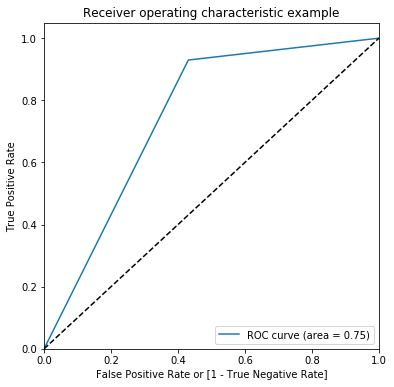

(array([0.        , 0.43082192, 1.        ]),
 array([0.        , 0.92957746, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [104]:
draw_roc( y_test, predicted_labels5 )

## Gradient Boosting after upsampling

In [135]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl1 = GradientBoostingClassifier(n_estimators = 50, random_state=1)
gbcl1 = gbcl1.fit(X_train_res, y_train_res)

In [137]:
predicted_labels6 = gbcl1.predict(X_test)
metrics.accuracy_score(predicted_labels6,y_test)

0.7877970672509692

## Important variables

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
dt_model = DecisionTreeClassifier()

In [107]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [108]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                     Imp
age             0.242503
job_type        0.031221
education       0.020062
education_num   0.161056
job             0.101102
marital_status  0.236048
religion        0.035454
gender          0.026637
hours_per_week  0.145917


In [109]:
z_data.head()

,age,job_type,education,education_num,job,marital_status,religion,gender,hours_per_week,income
0,0.678342,0.409043,-2.570846,-1.64709,-1.371094,0.931831,-4.382969,1.448060,0.321168,1
1,0.124288,0.409043,-2.570846,-1.64709,-1.106421,0.931831,-4.382969,-0.690579,-0.104469,1
2,-0.667219,0.409043,-2.570846,-1.64709,-0.841749,0.931831,-4.382969,-0.690579,-0.104469,1
3,-0.904671,0.409043,-2.570846,-1.64709,-0.312405,0.931831,-4.382969,-0.690579,2.874992,1
4,-0.034014,0.409043,-2.570846,-1.64709,-0.047733,0.931831,-3.195868,1.448060,-0.104469,1


In [110]:
#creating a model based on important features

In [111]:
# job_type ,education ,religion and gender having less feature importance.
features1 = z_data[["age","education_num","job","marital_status","hours_per_week"]]


label2 = z_data["income"]

In [112]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(features1, label2, test_size=0.2, random_state=0)

In [113]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl3 = GradientBoostingClassifier(n_estimators = 50, random_state=1)
gbcl3 = gbcl.fit(X_train1, y_train1)

In [114]:
predicted_labels11 = gbcl3.predict(X_test1)
metrics.accuracy_score(predicted_labels11,y_test1) # not crossing my best score

0.838193156918928

In [ ]:

values = z_data.values

n_iterations = 20    # Number of bootstrap samples to create
n_size = int(len(z_data) * 1)    # size of a bootstrap sample

# run bootstrap
stats = list()   # empty list that will hold the scores for each bootstrap iteration
for i in range(n_iterations):

    # prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
    # fit model
	gbmTree = GradientBoostingClassifier(n_estimators=50)
	gbmTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values
	y_test1 = test[:,-1]    # Take the target column for all rows in test set

    # evaluate model
	predictions = gbmTree.predict(test[:, :-1])   # predict based on independent variables in the test data
	score = gbmTree.score(test[:, :-1] , y_test1)

	stats.append(score)


In [ ]:
#oops, it's taking a lot of time even when n_iterations are reduced to 20.

In [ ]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

#### 6)Comparison of the models' performance and suggest the best model

### Of all the models i've performed ,best score gotten by me is 84% through the model "gradient boosting classifier" before upsampling

## i suggest gradient boosting to the leading market ABC for predicting the income levels.